# Using Inbuilt functions

In [115]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
import pandas as pd

## Data Processing

In [148]:
def read_data(path):
    
    train_path = path+"/train"
    test_path = path+"/test"
    validation_path = path+"/val"
    
    tr_data, test_data, val_data = [], [], []
    tr_out, test_out, val_out = [], [], []

    for i in os.listdir(train_path):
        try:
            for j in os.listdir(train_path+"/"+i):
                image = cv2.imread(train_path+"/"+i+"/"+j) #COLOR_BGR2RGB
                tr_data.append(cv2.resize(image, (224, 224)))
                tr_out.append(i)

            for j in os.listdir(test_path+"/"+i):
                image = cv2.imread(test_path+"/"+i+"/"+j)
                test_data.append(cv2.resize(image, (224, 224)))
                test_out.append(i)

            for j in os.listdir(validation_path+"/"+i):
                image = cv2.imread(validation_path+"/"+i+"/"+j)
                val_data.append(cv2.resize(image, (224, 224)))
                val_out.append(i)
        except:
            pass
                
    tr_data, test_data, val_data = np.array(tr_data), np.array(test_data), np.array(val_data)
    return tr_data, test_data, val_data, tr_out, test_out, val_out

In [149]:
def label_data(x):
    label = []
    for i in x:
        if i =='chandelier':
            label.append(0)
        if i =='ketch':
            label.append(1)
        if i =='bonsai':
            label.append(2)
    return label

In [150]:
path = "/Users/rajeshr/Desktop/Group_22"
tr_data, test_data, val_data, tr_out, test_out, val_out = read_data(path)

test_label = np.array(label_data(test_out))
tr_label = np.array(label_data(tr_out))
val_label = np.array(label_data(val_out))

In [174]:
path = '/Users/rajeshr/Desktop/Group_22/selected/'

images = []
color_images = []
label = []
for i in os.listdir(path):
    image = cv2.imread(path+i, cv2.IMREAD_GRAYSCALE)
    color_image = cv2.imread(path+i, cv2.COLOR_BGR2RGB)
    try:
        images.append(cv2.resize(image, (224, 224)))
        color_images.append(cv2.resize(color_image, (224, 224)))
        label.append(i)
    except:
        pass
    
images = np.array(images)
label = np.array(label)
color_images = np.array(color_images)
labels = np.arange(0, len(label))

## Building Model

In [190]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2), strides=(1, 1), padding='valid'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(1, 1), padding='valid'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3))

In [191]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 221, 221, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 219, 219, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 218, 218, 64)     0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 3041536)           0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [152]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(np.array(tr_data), tr_label, epochs=10, 
                    validation_data=(test_data, test_label))

Epoch 1/10
5/5 [==============================] - 56s 10s/step - loss: 43226.2305 - accuracy: 0.4200 - val_loss: 14999.3740 - val_accuracy: 0.3333
Epoch 2/10
5/5 [==============================] - 75s 16s/step - loss: 8747.9980 - accuracy: 0.3333 - val_loss: 1277.7657 - val_accuracy: 0.3333
Epoch 3/10
5/5 [==============================] - 59s 12s/step - loss: 379.8421 - accuracy: 0.6933 - val_loss: 79.9673 - val_accuracy: 0.8333
Epoch 4/10
5/5 [==============================] - 67s 13s/step - loss: 29.2762 - accuracy: 0.9333 - val_loss: 99.7058 - val_accuracy: 0.7333
Epoch 5/10
5/5 [==============================] - 70s 15s/step - loss: 16.2025 - accuracy: 0.9333 - val_loss: 108.0876 - val_accuracy: 0.7500
Epoch 6/10
5/5 [==============================] - 71s 14s/step - loss: 2.7106 - accuracy: 0.9867 - val_loss: 71.0372 - val_accuracy: 0.7333
Epoch 7/10
5/5 [==============================] - 62s 13s/step - loss: 0.3803 - accuracy: 0.9867 - val_loss: 60.5538 - val_accuracy: 0.7500
Epo

ValueError: in user code:

    File "/Users/rajeshr/miniforge3/envs/tensorflow_env/lib/python3.10/site-packages/keras/engine/training.py", line 1366, in test_function  *
        return step_function(self, iterator)
    File "/Users/rajeshr/miniforge3/envs/tensorflow_env/lib/python3.10/site-packages/keras/engine/training.py", line 1356, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/rajeshr/miniforge3/envs/tensorflow_env/lib/python3.10/site-packages/keras/engine/training.py", line 1349, in run_step  **
        outputs = model.test_step(data)
    File "/Users/rajeshr/miniforge3/envs/tensorflow_env/lib/python3.10/site-packages/keras/engine/training.py", line 1305, in test_step
        self.compiled_loss(
    File "/Users/rajeshr/miniforge3/envs/tensorflow_env/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/rajeshr/miniforge3/envs/tensorflow_env/lib/python3.10/site-packages/keras/losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/rajeshr/miniforge3/envs/tensorflow_env/lib/python3.10/site-packages/keras/losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/rajeshr/miniforge3/envs/tensorflow_env/lib/python3.10/site-packages/keras/losses.py", line 1664, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/rajeshr/miniforge3/envs/tensorflow_env/lib/python3.10/site-packages/keras/backend.py", line 4994, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 3) are incompatible


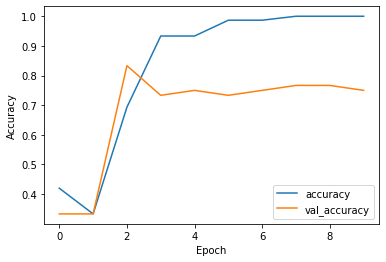

In [265]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_data,  test_label, verbose=1)

In [157]:
predictions = model.predict(test_data, verbose=1)
p_class = np.argmax(predictions, axis=1)
cm = tf.math.confusion_matrix(test_label, p_class)
cm

2/2 [==============================] - 1s 369ms/step


<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[12,  3,  5],
       [ 3, 14,  3],
       [ 1,  0, 19]], dtype=int32)>

In [266]:
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import load_img, img_to_array

In [267]:
sgd = SGD(learning_rate=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 221, 221, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 219, 219, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 218, 218, 64)     0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 3041536)           0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [268]:
layer = model.layers #Conv layers at 0, 2
filters, biases = model.layers[2].get_weights()
print(layer[2].name, filters.shape)

conv2d_21 (3, 3, 32, 64)


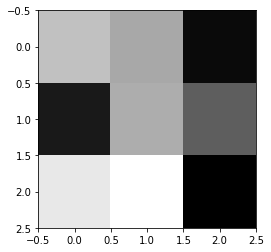

In [269]:
for i in range(64):
    f = filters[:, :, :, i]
    plt.imshow(f[:, :, 0], cmap='gray')
    plt.savefig('/Users/rajeshr/Desktop/f/filters'+str(i+1)+'.png')

In [292]:
conv_layer_index = [0] #[0, 1]
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=model.inputs, outputs=outputs)
print(model_short.summary())

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20_input (InputLayer  [(None, 224, 224, 3)]    0         
 )                                                               
                                                                 
 conv2d_20 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
None


In [293]:
label

array(['ketch.jpg', 'chandelier.jpg', 'bonsai.jpg'], dtype='<U14')

In [297]:
img = load_img('/Users/rajeshr/Desktop/Group_22/resized/chandelier.jpg', target_size=(224, 224))
img = img_to_array(img)
img = np.expand_dims(img, axis=0)
feature_output = model_short.predict(img)

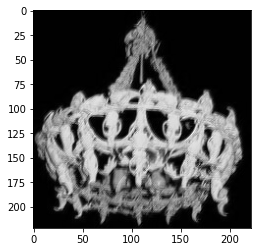

In [299]:
for ftr in feature_output:
    for i in range(32):
        plt.imshow(ftr[:, :, i], cmap='gray') #ftr[0, :, :, i]
        plt.savefig('/Users/rajeshr/Desktop/fm/fm'+str(i+1)+'.png')